In [1]:
import numpy as np
import matplotlib
from math import *
import networkx as nx
import matplotlib.pyplot as plt
from igraph import *
import scipy
import scipy.linalg as la
import seaborn as sns
from matplotlib import patches
from random import randint

Though not explicited in \cite{newman2013spectral}, the existence of the equivalent of the matrix $B'$ in the case of the flow matrix would save a lot of computation time and memory in the application of an algorithm based on this matrix. We are not aware of such matrix and try here to explicit one. We use the same approach used in \cite{krzakala2013spectral}, we find that:

\begin{equation}
    (Fg)_{u}^{in} = g^{out}_{u}
\end{equation}
\begin{equation}
    (Fg)_{u}^{out} = \sum_{v \in \mathcal{N}(u)} \frac{g^{out}_{v}}{d_{v} - 1} - \sum_{v \in \mathcal{N}(u)} \frac{g_{(v \rightarrow u)}}{d_{v} - 1}
\end{equation}

In [2]:
def WignerLaw(x, c):
    return ((sqrt(4*c - x**2))/(2*pi*c))

def plotEigenvalues(arr):
    sns.distplot(countVillage, hist=True, kde=False, 
             bins=20, color = 'blue',
             hist_kws={'edgecolor':'black'})

def overlap2(listLabel):
    n = len(listLabel)
    trueLabel1 = np.array([1 for i in range(int(n/2))] + [-1 for i in range(int(n/2))])
    trueLabel2 = np.array([-1 for i in range(int(n/2))] + [1 for i in range(int(n/2))])
    l1 = (np.multiply(listLabel, trueLabel1) + 1)/2
    l2 = (np.multiply(listLabel, trueLabel2) + 1)/2
    return((max(np.sum(l1), np.sum(l2)))/n - 0.5)

def arrayToSign(arr):
    lResult = []
    for el in arr:
        if el > 0:
            lResult.append(1)
        elif el < 0:
            lResult.append(-1)
        else :
            lResult.append(2*randint(0,1) - 1)
    return(np.array(lResult))

In [57]:
#Average degree
cin = 20
cout = 2
c = (cin + cout)/2
#Number of nodes
n = 4000

In [58]:
G = nx.stochastic_block_model([int(n/2),int(n/2)], [[cin/n, cout/n], [cout/n, cin/n]])
A = (nx.adjacency_matrix(G))

In [68]:
A[0]
B = scipy.sparse.csr_matrix((n,n))
B[0,0]=1
B

/home/pierre/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  This is separate from the ipykernel package so we can avoid doing imports until


<4000x4000 sparse matrix of type '<class 'numpy.float64'>'
	with 1 stored elements in Compressed Sparse Row format>

In [5]:
lOverlap = []
for i in range(30):
    G = nx.stochastic_block_model([int(n/2),int(n/2)], [[cin/n, cout/n], [cout/n, cin/n]])
    A = scipy.sparse.csr_matrix.toarray(nx.adjacency_matrix(G))
    w = la.eig(A)
    eigenval = w[0]
    eigenvec = w[1]
    L = nx.normalized_laplacian_matrix(G)

In [17]:
print(eigenval[1])
print(eigenvec[1])
L = scipy.sparse.csr_matrix.toarray(nx.normalized_laplacian_matrix(G))
w2 = la.eig(L)
eigenval2 = w[0]
eigenvec2 = w[1]
print(eigenval2[0])
print(eigenvec2[0])

(10.363705425442976+0j)
[ 0.01571696 -0.01775738 -0.00021157 ...  0.03049073  0.00645626
  0.        ]
(12.083464151457932+0j)
[ 1.58932446e-02 -1.06336974e-02 -2.19562444e-04 ... -1.34730418e-05
  1.59471891e-05  0.00000000e+00]


In [24]:
eigenval2 = w2[0]
eigenvec2 = w2[1]
print(eigenval2[10])
print(eigenvec2[0])
print(eigenvec[0])
eigenval[0]
indexSortedList = sorted([i for i in range(len(eigenval2))], key = lambda x : eigenval2[x])
print(indexSortedList)
print(eigenval2[3999])

(1.5669288255232137+0j)
[ 1.58164216e-02  1.12797151e-02 -1.37351602e-02 ... -6.51843961e-03
 -9.49143608e-05  0.00000000e+00]
[ 1.58932446e-02 -1.06336974e-02 -2.19562444e-04 ... -1.34730418e-05
  1.59471891e-05  0.00000000e+00]
[3999, 0, 1, 2, 3, 4, 25, 26, 27, 28, 29, 30, 37, 38, 39, 40, 45, 46, 50, 51, 52, 53, 54, 58, 59, 64, 65, 68, 69, 75, 77, 76, 80, 81, 84, 85, 86, 89, 90, 91, 95, 96, 97, 98, 99, 100, 108, 111, 112, 116, 119, 120, 121, 117, 118, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 183, 182, 186, 185, 184, 187, 188, 189, 190, 191, 192, 194, 193, 195, 197, 196, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 215, 216, 221, 222, 223, 226, 227, 228, 240, 238, 239, 245, 237, 244, 225, 224, 306, 307, 308, 309, 311, 310, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 324, 323, 325, 327, 326, 328, 329, 330, 331, 332, 335, 336, 334, 333, 337, 338, 339, 340, 342, 344, 345, 348, 347, 346, 353, 351, 350, 352, 349, 354, 35

In [27]:
overlap2(arrayToSign(eigenvec2[2]))

0.0044999999999999485

In [70]:
lEigen = np.array([])
for i in range(10):
    G = nx.stochastic_block_model([int(n/2),int(n/2)], [[cin/n, cout/n], [cout/n, cin/n]])
    A = scipy.sparse.csr_matrix.toarray(nx.adjacency_matrix(G))
    w2 = la.eig(A, right = False)
    lIndices = []
    for el in range(len(w2)):
        if w2[el].real == 0 and w2[el].imag == 0:
            lIndices.append(el)
    w3 = np.delete(w2, lIndices)
    lEigen = np.concatenate((lEigen, w3))

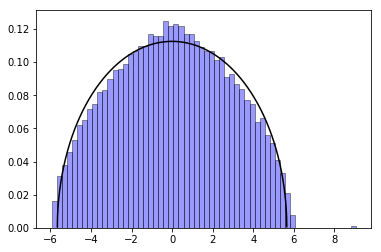

In [84]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)

sns.distplot(w3, hist=True, kde=False,norm_hist = True,
             bins=60, color = 'blue',
             hist_kws={'edgecolor':'black'})
arc = np.linspace(-2*sqrt(c)+0.0001, 2*sqrt(c)-0.0001, 1000)
y = [WignerLaw(el,c) for el in arc]
plt.plot(arc,y, 'k')
plt.savefig("SpectrumCaseNo11and5", dpi = 900)


In [108]:
w4 = la.eig(A)

In [114]:
eigenval = w4[0]
eigenvec = w4[1]

In [115]:
indexSortedList = sorted([i for i in range(len(eigenval))], key = lambda x : eigenval[x], reverse = True)

In [128]:
maxValue = 0
maxIndex = 0
for i in range(4000):
    value = overlap2(arrayToSign(eigenvec[indexSortedList[i]]))
    if value > maxValue:
        maxValue = value
        maxIndex = i
print(maxValue)
print(maxIndex)
print(eigenval[indexSortedList[maxIndex]])

0.02749999999999997
310
(-5.936340316726977+0j)


In [129]:
print(maxValue)
print(maxIndex)
print(eigenval[indexSortedList[maxIndex]])

0.02749999999999997
310
(4.182404544711112+0j)


## Non backtracking analysis

In [3]:
def intersection(lst1, lst2): 
    lst3 = [value for value in lst1 if value in lst2] 
    return lst3
#G = NetworkX Graph
def computeNonBackTracking(G):
    lEdges = list(G.edges())
    m = len(lEdges)
    B = np.zeros((2*m,2*m))
    for i in range(m):
        for j in range(i+1, m):
            couplei = lEdges[i]
            couplej = lEdges[j]
            if len(intersection(list(couplei), list(couplej))) == 1:
                if couplei[1] == couplej[0]:
                    B[2*i,2*j] = 1
                    B[2*j + 1,2*i + 1] = 1
                elif couplei[1] == couplej[1]:
                    B[2*i,2*j+1] = 1
                    B[2*j, 2*i + 1] = 1
                elif couplei[0] == couplej[0]:
                    B[2*i+1,2*j] = 1
                    B[2*j + 1, 2*i] = 1
                else :
                    B[2*i+1,2*j+1] = 1
                    B[2*j, 2*i] = 1
    return(scipy.sparse.csr_matrix(B))

def computeBPrime(G):
    n = len(G)
    z = np.zeros((n,n))
    o = np.eye(n)
    D = np.diag([el[1] for el in G.degree])
    A = scipy.sparse.csr_matrix.toarray(nx.adjacency_matrix(G))
    mat = np.concatenate((np.concatenate((z,D - o),axis=1), np.concatenate((-o,A), axis = 1)))
    return(mat)

def computeFlow(G):
    ## Work Out the Flow matrix
    lEdges = list(G.edges())
    m = len(lEdges)
    degree = dict(G.degree())
    B = scipy.sparse.lil_matrix((2*m,2*m))
    D = scipy.sparse.lil_matrix((2*m,2*m))
    for i in range(m):
        couplei = lEdges[i]
        if degree[couplei[1]] > 1:
            D[2*i, 2*i] = 1/(degree[couplei[1]] - 1)
        if degree[couplei[0]] > 1:
            D[2*i + 1, 2*i + 1] = 1/(degree[couplei[0]] - 1)
        for j in range(i+1, m):
            couplej = lEdges[j]
            if len(intersection(list(couplei), list(couplej))) == 1:
                if couplei[1] == couplej[0]:
                    B[2*i,2*j] = 1
                    B[2*j + 1,2*i + 1] = 1
                elif couplei[1] == couplej[1]:
                    B[2*i,2*j+1] = 1
                    B[2*j, 2*i + 1] = 1
                elif couplei[0] == couplej[0]:
                    B[2*i+1,2*j] = 1
                    B[2*j + 1, 2*i] = 1
                else :
                    B[2*i+1,2*j+1] = 1
                    B[2*j, 2*i] = 1
    return(scipy.sparse.csr_matrix(D) * scipy.sparse.csr_matrix(B))

def reluctantAndNormalized(G):
    lEdges = list(G.edges())
    m = len(lEdges)
    degree = dict(G.degree())
    R = scipy.sparse.lil_matrix((2*m,2*m))
    P = scipy.sparse.lil_matrix((2*m,2*m))
    for i in range(m):
        couplei = lEdges[i]
        R[2*i, 2*i + 1] = 1/degree[couplei[0]]
        R[2*i + 1, 2*i] = 1/degree[couplei[1]]
        P[2*i, 2*i + 1] = R[2*i, 2*i + 1]/(degree[couplei[1]] - 1 + (1/degree[couplei[0]]))
        P[2*i + 1, 2*i] = R[2*i + 1, 2*i]/(degree[couplei[0]] - 1 + (1/degree[couplei[1]]))
        for j in range(i+1, m):
            couplej = lEdges[j]
            if len(intersection(list(couplei), list(couplej))) == 1:
                if couplei[1] == couplej[0]:
                    R[2*i,2*j] = 1
                    R[2*j + 1,2*i + 1] = 1
                    P[2*i,2*j] = 1/(degree[couplei[1]] - 1 + (1/degree[couplei[0]]))
                    P[2*j + 1,2*i + 1] = 1/(degree[couplej[0]] - 1 + (1/degree[couplej[1]]))
                elif couplei[1] == couplej[1]:
                    R[2*i,2*j+1] = 1
                    R[2*j, 2*i + 1] = 1
                    P[2*i,2*j + 1] = 1/(degree[couplei[1]] - 1 + (1/degree[couplei[0]]))
                    P[2*j + 1,2*i + 1] = 1/(degree[couplej[1]] - 1 + (1/degree[couplej[0]]))
                elif couplei[0] == couplej[0]:
                    R[2*i+1,2*j] = 1
                    R[2*j + 1, 2*i] = 1
                    P[2*i + 1,2*j] = 1/(degree[couplei[0]] - 1 + (1/degree[couplei[1]]))
                    P[2*j + 1,2*i] = 1/(degree[couplej[0]] - 1 + (1/degree[couplej[1]]))
                else :
                    R[2*i+1,2*j+1] = 1
                    R[2*j, 2*i] = 1
                    P[2*i+1,2*j+1] = 1/(degree[couplei[0]] - 1 + (1/degree[couplei[1]]))
                    P[2*j, 2*i] = 1/(degree[couplej[1]] - 1 + (1/degree[couplej[0]]))
    return([scipy.sparse.csr_matrix(R),scipy.sparse.csr_matrix(P)])

def labelVect(vec,G):
    n = len(G)
    labels = np.zeros(n)
    lEdges = list(G.edges())
    for index, edge in enumerate(lEdges):
        labels[edge[1]] += vec[2*index]
        labels[edge[0]] += vec[2*index + 1]
    labels = arrayToSign(labels)
    return(labels)

def labelVectRel(vec,G):
    n = len(G)
    labels = np.zeros(n)
    lEdges = list(G.edges())
    for index, edge in enumerate(lEdges):
        labels[edge[0]] += vec[2*index]
        labels[edge[1]] += vec[2*index + 1]
    labels = arrayToSign(labels)
    return(labels)
    
def plotEigCom(arr,c):
    lReal = []
    lIm = []
    for elem in arr:
        lReal.append(elem.real)
        lIm.append(elem.imag)
    fig1 = plt.figure()
    ax1 = fig1.add_subplot(111)
    plt.plot(lReal, lIm, 'r.', markersize=2)
    lx = np.linspace(-sqrt(c)+0.0001, sqrt(c)-0.0001, 1000)
    ly1 = np.array([sqrt(c - el*el) for el in lx])
    ly2 = np.array([-sqrt(c - el*el) for el in lx])
    #plt.plot(lx, ly1, 'k')
    #plt.plot(lx,ly2, 'k')
    plt.savefig("SpectrumRelNor11a5", dpi = 900)

## Function running one analysis of the SBM with two equal communities
def overlapAnalysis(name, n, c, cdif):
    
    switcher = {
        "B": computeNonBackTracking,
        "F": computeFlow,
        "R": lambda x : reluctantAndNormalized(x)[0],
        "P": lambda x : reluctantAndNormalized(x)[0],
        "L" : lambda x : scipy.sparse.csr_matrix.toarray(nx.normalized_laplacian_matrix(x))
    }
    #In and Out degree
    cin = c + cdif
    cout = c - cdif
    #Graph
    G = nx.stochastic_block_model([int(n/2),int(n/2)], [[cin/n, cout/n], [cout/n, cin/n]])
    #Matrix
    B = switcher[name](G)
    #Spectrum
    w = scipy.sparse.linalg.eigs(B, k = 2, which = 'LR')
    eigenval = w[0]
    eigenvec = w[1]

    # Sort by eigenval
    indexSortedList = sorted([i for i in range(len(eigenval))], key = lambda x : eigenval[x].real, reverse = True)

    # Get second eigenvector
    comEigenvect = eigenvec[:,indexSortedList[1]]

    # Attribute community to the sign,
    if name == "R" or name == "P":
        attribution = labelVectRel(comEigenvect, G)
    else:
        attribution = labelVect(comEigenvect, G)

    #Compute Overlap
    overlap = overlap2(attribution)
    return(overlap)

def overlapAnalysisSpec(n, c, cdif):
    cin = c + cdif
    cout = c - cdif
    #Graph
    G = nx.stochastic_block_model([int(n/2),int(n/2)], [[cin/n, cout/n], [cout/n, cin/n]])
    #Matrix
    B = nx.adjacency_matrix(G)
    B = scipy.sparse.csr_matrix(B, dtype='d')
    #Spectrum
    w = scipy.sparse.linalg.eigs(B, k = 2, which = 'LR')
    eigenval = w[0]
    eigenvec = w[1]
    # Sort by eigenval
    indexSortedList = sorted([i for i in range(len(eigenval))], key = lambda x : eigenval[x].real, reverse = True)

    # Get second eigenvector
    comEigenvect = eigenvec[:,indexSortedList[1]]

    # Attribute community to the sign
    attribution = arrayToSign(comEigenvect)
    #Compute Overlap
    overlap = overlap2(attribution)
    return(overlap)

In [20]:
#Average degree
cin = 11
cout = 5
c = (cin + cout)/2
#Number of nodes
n = 1000

In [21]:
G = nx.stochastic_block_model([int(n/2),int(n/2)], [[cin/n, cout/n], [cout/n, cin/n]])
[R,P] = reluctantAndNormalized(G)

In [22]:
w = scipy.sparse.linalg.eigs(P, k = 500, which = 'LM')

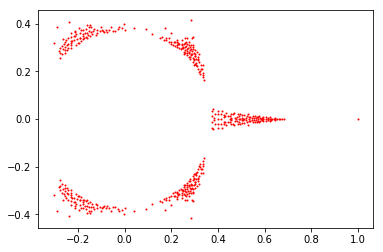

In [23]:
eigenval = w[0]

eigenvec = w[1]
plotEigCom(eigenval,0.5)

In [195]:
eigenval[:2]

array([1.        +0.j, 0.81798475+0.j])

In [8]:
G = nx.from_numpy_matrix(np.array([[0,1,1],[1,0,0],[1,0,0]]))
print(G.edges())
[R,P]= reluctantAndNormalized(G)
print(R)
print("Holla")
print(P)
print(computeNonBackTracking(G))

[(0, 1), (0, 2)]
  (0, 1)	0.5
  (1, 0)	1.0
  (1, 2)	1.0
  (2, 3)	0.5
  (3, 0)	1.0
  (3, 2)	1.0
Holla
  (0, 1)	1.0
  (1, 0)	0.5
  (1, 2)	0.5
  (2, 3)	1.0
  (3, 0)	0.5
  (3, 2)	0.5
[[0 0 0 0]
 [0 0 1 0]
 [0 0 0 0]
 [1 0 0 0]]


In [ ]:
plotEigCom(la.eig(np.array([[1+1j, 0],[0, 2+1j]]))[0])

## Performace study on the SBM

In [5]:
### Average degree
c = 3
cdif = 3
cin = c + cdif
cout = c - cdif
#Number of nodes
n = 4000

In [130]:
overlapAnalysis("F", n, c, cdif)

/home/pierre/.local/lib/python3.6/site-packages/ipykernel_launcher.py:109: ComplexWarning: Casting complex values to real discards the imaginary part
/home/pierre/.local/lib/python3.6/site-packages/ipykernel_launcher.py:110: ComplexWarning: Casting complex values to real discards the imaginary part


0.07399999999999995

1.2
Hourra


/home/pierre/.local/lib/python3.6/site-packages/ipykernel_launcher.py:119: ComplexWarning: Casting complex values to real discards the imaginary part
/home/pierre/.local/lib/python3.6/site-packages/ipykernel_launcher.py:120: ComplexWarning: Casting complex values to real discards the imaginary part


Hourra
Hourra
Hourra
Hourra
Hourra
Hourra
Hourra
Hourra
Hourra
Hourra
Hourra
Hourra
Hourra
Hourra
Hourra
Hourra
Hourra
Hourra
Hourra
1.3
Hourra
Hourra
Hourra
Hourra
Hourra
Hourra
Hourra
Hourra
Hourra
Hourra
Hourra
Hourra
Hourra
Hourra
Hourra
Hourra
Hourra
Hourra
Hourra
Hourra
1.4
Hourra
Hourra
Hourra
Hourra
Hourra
Hourra
Hourra
Hourra
Hourra
Hourra
Hourra
Hourra
Hourra
Hourra
Hourra
Hourra
Hourra
Hourra
Hourra
Hourra
1.5
Hourra
Hourra
Hourra
Hourra
Hourra
Hourra
Hourra
Hourra
Hourra
Hourra
Hourra
Hourra
Hourra
Hourra
Hourra
Hourra
Hourra
Hourra
Hourra
Hourra
1.6
Hourra
Hourra
Hourra
Hourra
Hourra
Hourra
Hourra
Hourra
Hourra
Hourra
Hourra
Hourra
Hourra
Hourra
Hourra
Hourra
Hourra
Hourra
Hourra
Hourra
1.7
Hourra
Hourra
Hourra
Hourra
Hourra
Hourra
Hourra
Hourra
Hourra
Hourra
Hourra
Hourra
Hourra
Hourra
Hourra
Hourra
Hourra
Hourra
Hourra
Hourra
1.8
Hourra
Hourra
Hourra
Hourra
Hourra
Hourra
Hourra
Hourra
Hourra
Hourra
Hourra
Hourra
Hourra
Hourra
Hourra
Hourra
Hourra
Hourra
Hourra
Hourra
1.9

<ErrorbarContainer object of 3 artists>

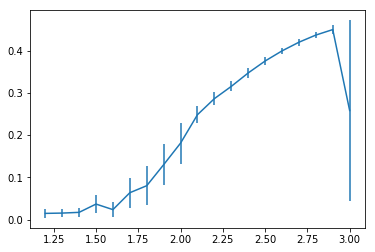

In [6]:
listP = []
listPerror = []
listc = [1.2 + 0.1*i for i in range(19)]
for cdif in listc:
    print(cdif)
    listPlocal = []
    for j in range(20):
        print("Hourra")
        try :
            value = overlapAnalysis("P", n, c, cdif)
            listPlocal.append(value)
        except :
            print("DOmmage")
    listP.append(np.mean(listPlocal))
    listPerror.append(np.std(listPlocal))
plt.errorbar(x = listc, y = listP, yerr = listPerror)

In [7]:
print(listP)
print(listPerror)

[0.015037499999999999, 0.015749999999999986, 0.0174875, 0.03704999999999999, 0.023924999999999995, 0.06391250000000001, 0.0805, 0.1302125, 0.1812125, 0.248375, 0.28633749999999997, 0.3153375, 0.34711250000000005, 0.375325, 0.39926249999999996, 0.4197375, 0.43667500000000004, 0.449625, 0.25831249999999994]
[0.010717764167493158, 0.01017625913585145, 0.011324882725662112, 0.022091372750465285, 0.017820651643528636, 0.03557696542357148, 0.04558912973505855, 0.04907960848203662, 0.048260249882796924, 0.02048604708087923, 0.015030443065658457, 0.01192876643873959, 0.01216307809520271, 0.008463192364586784, 0.007967698460032233, 0.007826427585431294, 0.007322951932110437, 0.010560687714348913, 0.21340980054521866]


1.2
1.3
1.4
1.5
1.6
1.7
1.8
1.9
2.0
2.1
2.2
2.3
2.4000000000000004
2.5
2.6
2.7
2.8
2.9000000000000004
3.0


<ErrorbarContainer object of 3 artists>

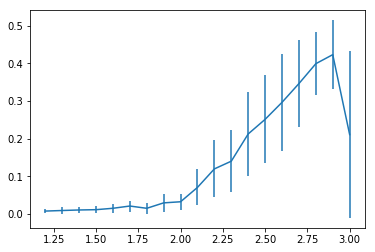

In [61]:
### Average degree
c = 3
#Number of nodes
n = 10000
listR = []
listRerror = []
listc = [1.2 + 0.1*i for i in range(19)]
for cdif in listc:
    print(cdif)
    listRlocal = []
    for j in range(20):
        val = overlapAnalysisSpec(n,c,cdif)
        listRlocal.append(val)
    listR.append(np.mean(listLlocal))
    listRerror.append(np.std(listRlocal))
plt.errorbar(x = listc, y = listR, yerr = listRerror)

In [62]:
print(listL)
print(listLerror)

[0.007559999999999995, 0.009069999999999995, 0.010459999999999997, 0.011254999999999998, 0.014974999999999994, 0.02093500000000001, 0.014914999999999994, 0.029329999999999988, 0.032275, 0.07039500000000001, 0.11952000000000003, 0.13999000000000003, 0.21227999999999997, 0.25101, 0.296185, 0.34595499999999996, 0.39875000000000005, 0.42274500000000004, 0.21053000000000002]
[0.0059516720339749885, 0.008326950222020063, 0.007418045564702345, 0.009864759246935527, 0.011739287670041993, 0.014575365347050466, 0.013871347266938418, 0.02395285160476722, 0.020800045072066543, 0.04784454488235832, 0.07540752349732749, 0.0824260692984932, 0.11170453706094485, 0.11677029117031437, 0.1290474923235628, 0.11462135697591441, 0.08300036445703116, 0.09133206159394411, 0.22113447288923546]


/home/pierre/.local/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


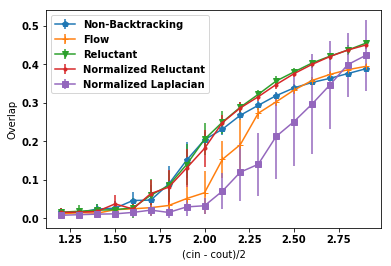

In [9]:
listc = [1.2 + 0.1*i for i in range(19)]
listB = [0.015037500000000004, 0.014287499999999991, 0.023737500000000005, 0.025925000000000004, 0.04586842105263158, 0.0469625, 0.08852499999999999, 0.15063749999999998, 0.2037375, 0.231225, 0.2673249999999999, 0.2930499999999999, 0.3181999999999999, 0.3383374999999999, 0.35243749999999996, 0.36311250000000006, 0.37555, 0.38796250000000004, 0.1681]#[0.02310000000000002, 0.03230000000000001, 0.03040000000000001, 0.04430000000000002, 0.0638, 0.07135, 0.09970000000000001, 0.14815, 0.17124999999999999, 0.21990000000000004, 0.26135, 0.28609999999999997, 0.3173, 0.3298, 0.35235, 0.3628, 0.37055000000000005, 0.3778999999999999, 0.1486]
listBerror = [0.011911463753460376, 0.011539950985597819, 0.014379341735628942, 0.01918317948099324, 0.02339427061284291, 0.0380441581422168, 0.04693172567677434, 0.04644583370712598, 0.019970990680234158, 0.015892588681520697, 0.01177208031742903, 0.010871867364901025, 0.010314613419803968, 0.009948390259232895, 0.005670579225264382, 0.008040706980732478, 0.0072554290017889204, 0.00672601061179657, 0.18002877200603243]#[0.01696437443585824, 0.025816854959502703, 0.02842428539119321, 0.03136415151092086, 0.0334299267124533, 0.04074957054988432, 0.06151105591680246, 0.05892560988229142, 0.0479800739891051, 0.0541072083922281, 0.030687578920468812, 0.026547881271393393, 0.024831633051412446, 0.018419011917038326, 0.014419691397529988, 0.017673709288092317, 0.02016054314744523, 0.019866806487203743, 0.15384648192272712]

listF = [0.01051249999999999, 0.014837500000000009, 0.012787500000000002, 0.022099999999999998, 0.024287499999999997, 0.027350000000000003, 0.0329625, 0.050949999999999995, 0.066075, 0.1528, 0.19115, 0.2725375, 0.30223750000000005, 0.33275, 0.3575125, 0.37327499999999997, 0.3856, 0.39422499999999994, 0.26189999999999997]#[0.024150000000000015, 0.020350000000000017, 0.017150000000000016, 0.03040000000000001, 0.03475000000000002, 0.046099999999999995, 0.05350000000000001, 0.06050000000000002, 0.1045, 0.15350000000000003, 0.21375000000000002, 0.27549999999999997, 0.3056, 0.33344999999999997, 0.3524, 0.37315, 0.383, 0.3874, 0.21390000000000003]
listFerror = [0.00679267758325095, 0.0116362244198881, 0.00552849154381193, 0.01415768342632367, 0.01638411482961469, 0.020692752354387275, 0.020963252818921013, 0.03068026645907757, 0.05628332901490459, 0.04792941424636859, 0.06738172044404922, 0.015065124252723577, 0.010958579686711234, 0.009920307454912885, 0.008673405833350589, 0.005602956808685917, 0.004830502044301401, 0.005963901826824451, 0.18928185663184943] #[0.0059516720339749885, 0.008326950222020063, 0.007418045564702345, 0.009864759246935527, 0.011739287670041993, 0.014575365347050466, 0.013871347266938418, 0.02395285160476722, 0.020800045072066543, 0.04784454488235832, 0.07540752349732749, 0.0824260692984932, 0.11170453706094485, 0.11677029117031437, 0.1290474923235628, 0.11462135697591441, 0.08300036445703116, 0.09133206159394411, 0.22113447288923546]#[0.018188664052095748, 0.012783876563859662, 0.013256224952828776, 0.021298826258740165, 0.021205836460748244, 0.03383474545493137, 0.04526753803775946, 0.03614069728159654, 0.05851111005612524, 0.0764156397604574, 0.06923068322644231, 0.03269327147900619, 0.034712245677858404, 0.017853501057215636, 0.01618456054392582, 0.009144807269702307, 0.009332738076256087, 0.016249307677559693, 0.1913104544973954]

listR = [0.015612500000000001, 0.017999999999999988, 0.020925, 0.021975, 0.026949999999999995, 0.05967499999999999, 0.084975, 0.13928749999999998, 0.20478749999999998, 0.2493625, 0.28827499999999995, 0.3215375, 0.35621250000000004, 0.3799125, 0.40283750000000007, 0.4206125, 0.4365125000000001, 0.4543500000000001, 0.28976250000000003]#[0.016625, 0.015512500000000007, 0.018124999999999995, 0.028087499999999994, 0.04771250000000001, 0.045200000000000004, 0.11347500000000002, 0.123925, 0.202625, 0.24442500000000003, 0.292325, 0.32389999999999997, 0.352625, 0.38183749999999994, 0.3992, 0.4189, 0.43931250000000005, 0.4493875, 0.2475]#[0.03570000000000002, 0.03175000000000003, 0.0512, 0.0473, 0.07019999999999998, 0.0874, 0.10335000000000001, 0.13325, 0.18439999999999998, 0.22555000000000006, 0.3013, 0.32270000000000004, 0.3529, 0.37025, 0.39780000000000004, 0.4096, 0.4242, 0.44189999999999996, 0.24619999999999997]
listRerror = [0.01055831277951169, 0.015595071336803832, 0.01700902334056839, 0.015379145782519922, 0.026266137896538966, 0.04081621154639417, 0.03805110872234868, 0.05272092059846831, 0.041921300895248946, 0.030223694657503405, 0.014566421145909511, 0.012322305739998499, 0.012055153203091204, 0.009872080264564308, 0.005813924556614064, 0.005179572255505288, 0.01290989809216168, 0.005452293095569978, 0.2210703716438501]#[0.012793919454178218, 0.014080899074632986, 0.013533407737890706, 0.02069333754496842, 0.02515964961500855, 0.03303914345136691, 0.038962874958093106, 0.06422431879747735, 0.0305734259611186, 0.022807633042470667, 0.013945227678313464, 0.011549729434060347, 0.011014337247424365, 0.009469119217223947, 0.00792803569618603, 0.005989261223222785, 0.006815366369462455, 0.009420215960900256, 0.2088596269028555]#[0.019055445415943437, 0.018991774535308717, 0.02955097291122576, 0.02973398728727782, 0.03773009408946656, 0.06880363362497652, 0.05935509666406079, 0.06218269453795001, 0.05784237201221956, 0.07417578782864392, 0.02855538478115816, 0.02580329436331723, 0.02422374867769231, 0.012684143644724317, 0.015863795258386326, 0.023026940743398814, 0.02111066081391105, 0.013494072772888072, 0.19518314476409068]

listP = [0.015037499999999999, 0.015749999999999986, 0.0174875, 0.03704999999999999, 0.023924999999999995, 0.06391250000000001, 0.0805, 0.1302125, 0.1812125, 0.248375, 0.28633749999999997, 0.3153375, 0.34711250000000005, 0.375325, 0.39926249999999996, 0.4197375, 0.43667500000000004, 0.449625, 0.25831249999999994]#[0.013999999999999995, 0.013662500000000011, 0.01737500000000001, 0.02298750000000001, 0.042949999999999995, 0.053725, 0.07332500000000002, 0.14855000000000002, 0.19425, 0.24201249999999996, 0.2906, 0.32686249999999994, 0.34904999999999997, 0.37727499999999997, 0.40275, 0.41825, 0.4386375, 0.4519000000000001, 0.2183125]#[0.025700000000000018, 0.030850000000000023, 0.045, 0.051400000000000015, 0.059899999999999995, 0.06785000000000001, 0.12190000000000001, 0.18075000000000002, 0.22915000000000002, 0.23555, 0.2874500000000001, 0.29535000000000006, 0.35445000000000004, 0.3746, 0.3908, 0.41385000000000005, 0.42835, 0.44604999999999995, 0.24935000000000002]
listPerror = [0.010717764167493158, 0.01017625913585145, 0.011324882725662112, 0.022091372750465285, 0.017820651643528636, 0.03557696542357148, 0.04558912973505855, 0.04907960848203662, 0.048260249882796924, 0.02048604708087923, 0.015030443065658457, 0.01192876643873959, 0.01216307809520271, 0.008463192364586784, 0.007967698460032233, 0.007826427585431294, 0.007322951932110437, 0.010560687714348913, 0.21340980054521866]#[0.014871533209457588, 0.009206748543867167, 0.009862016781571606, 0.019363863735060736, 0.0245952993476396, 0.033513141079284124, 0.0495548370494748, 0.030360088932676062, 0.04614217160039176, 0.03473754048216424, 0.012601686395082202, 0.01210590635805515, 0.009602929240601544, 0.008856106650215988, 0.007397634757136907, 0.009655956710756327, 0.008527336556627739, 0.005223983154643601, 0.21550168031537478]#[0.020233882474700704, 0.02193005927944565, 0.03135761470520356, 0.03394318782907697, 0.039649590161816295, 0.049475524251896504, 0.06696110811508424, 0.04677913530624522, 0.04509021512479177, 0.06247917653106514, 0.03305521895253455, 0.03706248102866293, 0.026667348949605027, 0.018529436041067215, 0.021301643129110974, 0.015074067135315552, 0.01518642485906407, 0.015602804235136682, 0.2146239210805729]

listL = [0.007559999999999995, 0.009069999999999995, 0.010459999999999997, 0.011254999999999998, 0.014974999999999994, 0.02093500000000001, 0.014914999999999994, 0.029329999999999988, 0.032275, 0.07039500000000001, 0.11952000000000003, 0.13999000000000003, 0.21227999999999997, 0.25101, 0.296185, 0.34595499999999996, 0.39875000000000005, 0.42274500000000004, 0.21053000000000002]#[0.023140000000000015, 0.03408000000000001, 0.02768000000000001, 0.047380000000000005, 0.04792000000000002, 0.06428, 0.08072000000000001, 0.094, 0.12214, 0.15081999999999998, 0.20162000000000002, 0.22726, 0.26454, 0.31082, 0.33837999999999996, 0.38638000000000006, 0.39454000000000006, 0.41501999999999994, 0.22233999999999998]
listLerror = [0.0059516720339749885, 0.008326950222020063, 0.007418045564702345, 0.009864759246935527, 0.011739287670041993, 0.014575365347050466, 0.013871347266938418, 0.02395285160476722, 0.020800045072066543, 0.04784454488235832, 0.07540752349732749, 0.0824260692984932, 0.11170453706094485, 0.11677029117031437, 0.1290474923235628, 0.11462135697591441, 0.08300036445703116, 0.09133206159394411, 0.22113447288923546]#[0.018568801792253585, 0.021368050917198782, 0.02091835557590509, 0.032053636299178276, 0.034860774518074025, 0.04266382073841957, 0.04987465889607667, 0.05140972670613997, 0.07033832810068776, 0.06830071449113838, 0.07604074960177602, 0.07572075276963378, 0.07773601739219729, 0.08243438360296024, 0.07375903741237409, 0.05260832253550765, 0.0657693576067153, 0.04325944521142174, 0.18047543988033385]

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 10}

matplotlib.rc('font', **font)
plt.xlabel("(cin - cout)/2")
plt.ylabel("Overlap")
plt.errorbar(x = listc[:18], y = listB[:18], yerr = listBerror[:18], marker = 'p', label = "Non-Backtracking")
plt.errorbar(x = listc[:18], y = listF[:18], yerr = listFerror[:18], marker = '+', label = "Flow")
plt.errorbar(x = listc[:18], y = listR[:18], yerr = listRerror[:18], marker = 'v', label = "Reluctant")
plt.errorbar(x = listc[:18], y = listP[:18], yerr = listPerror[:18], marker = '.', label = "Normalized Reluctant")
plt.errorbar(x = listc[:18], y = listL[:18], yerr = listLerror[:18], marker = 's', label = "Normalized Laplacian")
plt.legend()
plt.savefig("plotPerfSbm", dpi = 900)

## Real World Data

In [ ]:
list